# Loan Approval Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay
)
from sklearn.utils import resample

In [2]:
df = pd.read_csv('2018_hmda_processed.csv')
df.head()

,Unnamed: 0,activity_year,county_code,census_tract,conforming_loan_limit,action_taken,preapproval,loan_purpose,reverse_mortgage,open_end_line_of_credit,...,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,has_co_applicant,dti,race,ethnicity,loan_value_ratio,credit history,employment history
0,0,2018,12071,12071010407,1,1,2,1,2,2,...,2291,3211,21,1,3,1.0,2.0,20092.055434,1,1
1,1,2018,42091,42091206105,1,1,2,1,2,2,...,1514,1620,18,1,5,1.0,2.0,29407.482240,1,1
2,2,2018,39093,39093080700,1,1,2,3,2,2,...,3127,3515,13,0,5,1.0,2.0,14908.513018,1,1
3,3,2018,8041,8041005109,1,1,2,3,2,2,...,2023,2749,0,0,6,1.0,2.0,4719.937731,1,1
4,4,2018,6017,6017030808,1,1,2,1,2,2,...,1880,2182,23,1,5,1.0,2.0,23190.523089,1,1


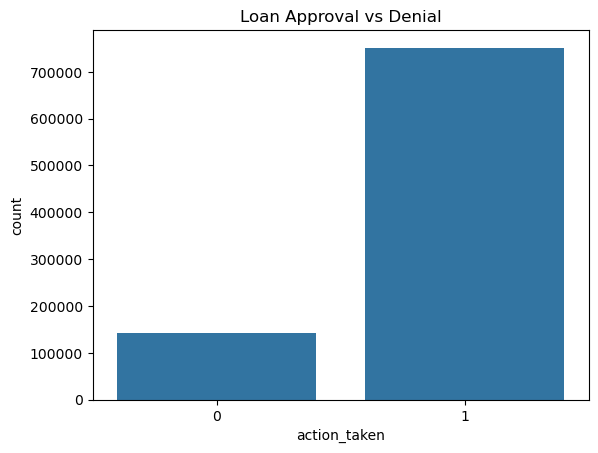

In [3]:
sns.countplot(data=df, x='action_taken')
plt.title('Loan Approval vs Denial')
plt.show()

In [4]:
from sklearn.naive_bayes import GaussianNB

# Define features and target
X = df.drop(columns=[
    'action_taken', 'applicant_age_above_62', 'reverse_mortgage',
    'open_end_line_of_credit', 'race', 'ethnicity', 'applicant_sex',
    'census_tract', 'county_code'
])
y = df['action_taken']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions and Probs
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes F1 Score:", f1_score(y_test, y_pred_nb))
print("Naive Bayes ROC AUC Score:", roc_auc_score(y_test, y_proba_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.6833575500167653
Naive Bayes F1 Score: 0.7905468848192699
Naive Bayes ROC AUC Score: 0.6765712322724373

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.54      0.35     28627
           1       0.89      0.71      0.79    150313

    accuracy                           0.68    178940
   macro avg       0.58      0.62      0.57    178940
weighted avg       0.79      0.68      0.72    178940



Accuracy: 0.6833575500167653
F1 Score: 0.7905468848192699
ROC AUC Score: 0.6765712322724373

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.54      0.35     28627
           1       0.89      0.71      0.79    150313

    accuracy                           0.68    178940
   macro avg       0.58      0.62      0.57    178940
weighted avg       0.79      0.68      0.72    178940



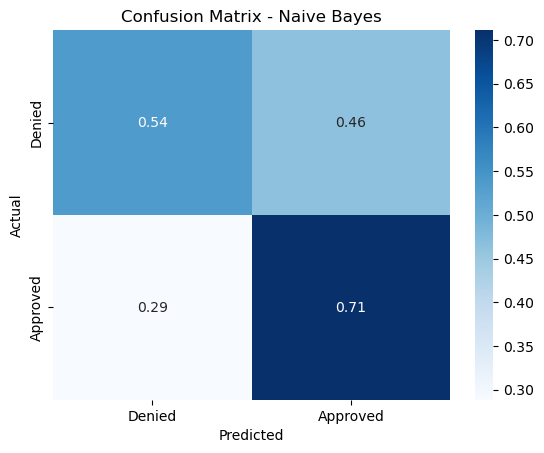

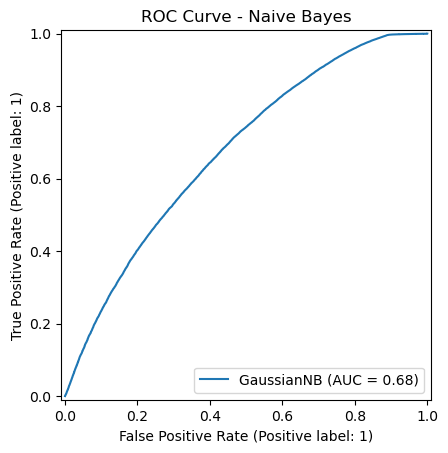

In [15]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_nb, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.title("Confusion Matrix - Naive Bayes")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(nb, X_test, y_test)
plt.title("ROC Curve - Naive Bayes")
plt.show()

🔍 Evaluation Metrics for Naive Bayes:
Accuracy: 0.6833575500167653
F1 Score: 0.7905468848192699
ROC AUC Score: 0.6765712322724373

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.54      0.35     28627
           1       0.89      0.71      0.79    150313

    accuracy                           0.68    178940
   macro avg       0.58      0.62      0.57    178940
weighted avg       0.79      0.68      0.72    178940



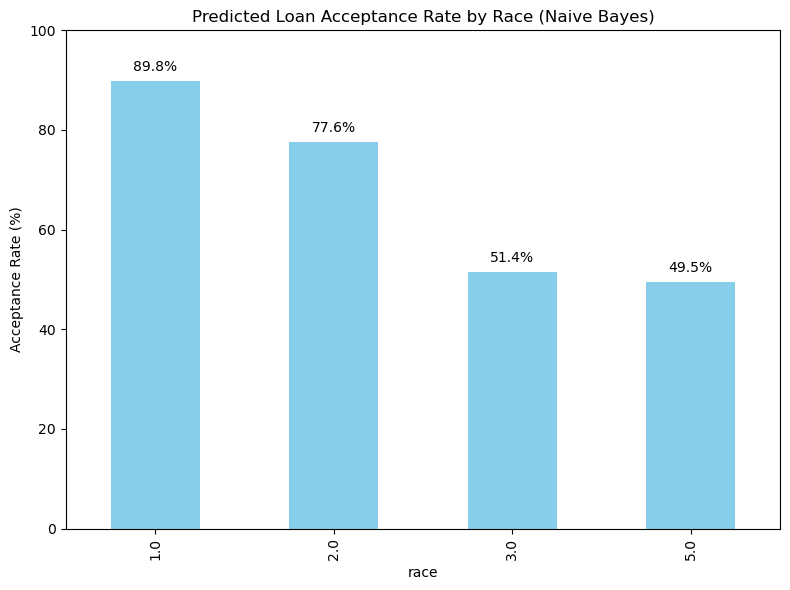


📊 Demographic Parity Metrics for race (privileged = '1.0')
  Acceptance Rate (Privileged): 0.8984
  Acceptance Rate (Unprivileged): 0.5949
  Demographic Parity Difference: -0.3035
  Disparate Impact Ratio: 0.6622


In [14]:
print("🔍 Evaluation Metrics for Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# ------------------------------
# Step 5: Merge predictions with race info
# ------------------------------

df_test_nb = df.loc[X_test.index].copy()
df_test_nb["predicted_action_taken"] = y_pred_nb

# ------------------------------
# Step 6: Acceptance Rate by Race
# ------------------------------

acceptance_by_race_nb = (
    df_test_nb.groupby("race")["predicted_action_taken"].mean() * 100
)

plt.figure(figsize=(8, 6))
acceptance_by_race_nb.plot(kind="bar", color="skyblue")

plt.title("Predicted Loan Acceptance Rate by Race (Naive Bayes)")
plt.ylabel("Acceptance Rate (%)")
plt.ylim(0, 100)

for i, pct in enumerate(acceptance_by_race_nb):
    plt.text(i, pct + 2, f"{pct:.1f}%", ha='center')

plt.tight_layout()
plt.show()

# ------------------------------
# Step 7: Demographic Parity Metrics
# ------------------------------

def demographic_parity_metrics(df, group_col, pred_col, privileged_value):
    privileged = df[df[group_col] == privileged_value]
    unprivileged = df[df[group_col] != privileged_value]

    privileged_rate = privileged[pred_col].mean()
    unprivileged_rate = unprivileged[pred_col].mean()

    dp_diff = unprivileged_rate - privileged_rate
    di_ratio = unprivileged_rate / privileged_rate if privileged_rate else np.nan

    print(f"\n📊 Demographic Parity Metrics for {group_col} (privileged = '{privileged_value}')")
    print(f"  Acceptance Rate (Privileged): {privileged_rate:.4f}")
    print(f"  Acceptance Rate (Unprivileged): {unprivileged_rate:.4f}")
    print(f"  Demographic Parity Difference: {dp_diff:.4f}")
    print(f"  Disparate Impact Ratio: {di_ratio:.4f}")

# Run DP metrics for race and sex (if available)
demographic_parity_metrics(df_test_nb, group_col='race', pred_col='predicted_action_taken', privileged_value=1.0)
